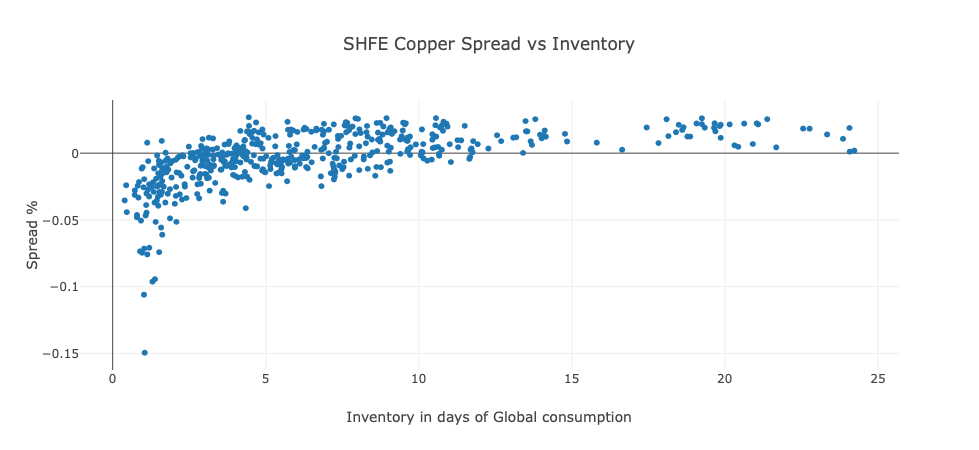

In [27]:
cons_data=[1869, 2226, 2663, 3020, 3171, 3621, 3571, 4746, 5149, 7086, 7385, 7881, 8896, 9830, 11303, 11353, 11642, 11790]
cons_date=pd.to_datetime(['2000-12-31', '2001-12-31', '2002-12-31', '2003-12-31', '2004-12-31', '2005-12-31', '2006-12-31', 
           '2007-12-31', '2008-12-31', '2009-12-31', '2010-12-31', '2011-12-31', '2012-12-31', '2013-12-31', '2014-12-31',
           '2015-12-31', '2016-12-31', '2017-12-31'])
cons = pd.DataFrame(data = cons_data, index=cons_date)

inv = pd.read_pickle('data/inventory.pkl').dropna()
inv['cons'] = cons
inv['cons'] = inv['cons'].ffill().bfill()
inv['SHFE On Warrant in Days'] = inv['SHFE On Warrant']/inv.cons

sp = pd.read_pickle('data/SCFc-fc-spread')['SCFc07'].dropna()
sp_vs_inv = pd.concat([inv,sp], axis=1).dropna()

iplot(go.Figure(data=[go.Scatter(x=sp_vs_inv['SHFE On Warrant in Days'], y=sp_vs_inv.SCFc07, mode='markers')],
     layout=go.Layout(title='SHFE Copper Spread vs Inventory', 
                      xaxis=dict(title='Inventory in days of Global consumption'),
                      yaxis=dict(title='Spread %'))))



In [71]:
ints = pd.date_range(sp_vs_inv.index.min(), sp_vs_inv.index.max(), periods=4)

r = sp_vs_inv.SCFc07.corr(sp_vs_inv['SHFE On Warrant in Days'], method='pearson')
int_0p = utl.rCI(r, len(sp_vs_inv), method='pearson')
r = sp_vs_inv.SCFc07.corr(sp_vs_inv['SHFE On Warrant in Days'], method='spearman')
int_0s = utl.rCI(r, len(sp_vs_inv), method='spearman')

r = sp_vs_inv.SCFc07[ints[0]:ints[1]].corr(sp_vs_inv['SHFE On Warrant in Days'], method='pearson')
int_1p = utl.rCI(r, len(sp_vs_inv), method='pearson')
r = sp_vs_inv.SCFc07[ints[0]:ints[1]].corr(sp_vs_inv['SHFE On Warrant in Days'], method='spearman')
int_1s = utl.rCI(r, len(sp_vs_inv), method='spearman')

r = sp_vs_inv.SCFc07[ints[1]:ints[2]].corr(sp_vs_inv['SHFE On Warrant in Days'], method='pearson')
int_2p = utl.rCI(r, len(sp_vs_inv), method='pearson')
r = sp_vs_inv.SCFc07[ints[1]:ints[2]].corr(sp_vs_inv['SHFE On Warrant in Days'], method='spearman')
int_2s = utl.rCI(r, len(sp_vs_inv), method='spearman')

r = sp_vs_inv.SCFc07[ints[2]:ints[3]].corr(sp_vs_inv['SHFE On Warrant in Days'], method='pearson')
int_3p = utl.rCI(r, len(sp_vs_inv), method='pearson')
r = sp_vs_inv.SCFc07[ints[2]:ints[3]].corr(sp_vs_inv['SHFE On Warrant in Days'], method='spearman')
int_3s = utl.rCI(r, len(sp_vs_inv), method='spearman')

table = pd.DataFrame(data = [int_0p, int_1p, int_2p, int_3p], 
                     columns=['Pearson Correlation', 'Lower Limit', 'Upper Limit'], index=['2008-2018', 
                                                                         '%s - %s'%(ints[0].date(),ints[1].date()),
                                                                         '%s - %s'%(ints[1].date(),ints[2].date()),
                                                                         '%s - %s'%(ints[2].date(),ints[3].date()),
                                                                        ])
table

table = pd.DataFrame(data = [int_0s, int_1s, int_2s, int_3s], 
                     columns=['Spearman Correlation', 'Lower Limit', 'Upper Limit'], index=['2008-2018', 
                                                                         '%s - %s'%(ints[0].date(),ints[1].date()),
                                                                         '%s - %s'%(ints[1].date(),ints[2].date()),
                                                                         '%s - %s'%(ints[2].date(),ints[3].date()),
                                                                        ])
table

,Pearson Correlation,Lower Limit,Upper Limit
2008-2018,0.557575,0.495084,0.614327
2008-01-04 - 2011-08-12,0.625405,0.569849,0.675270
2011-08-12 - 2015-03-20,0.695891,0.648528,0.737886
2015-03-20 - 2018-10-26,0.493534,0.425334,0.556160


,Spearman Correlation,Lower Limit,Upper Limit
2008-2018,0.694649,0.647132,0.736790
2008-01-04 - 2011-08-12,0.816208,0.785210,0.843126
2011-08-12 - 2015-03-20,0.685805,0.637206,0.728971
2015-03-20 - 2018-10-26,0.509700,0.442865,0.570903


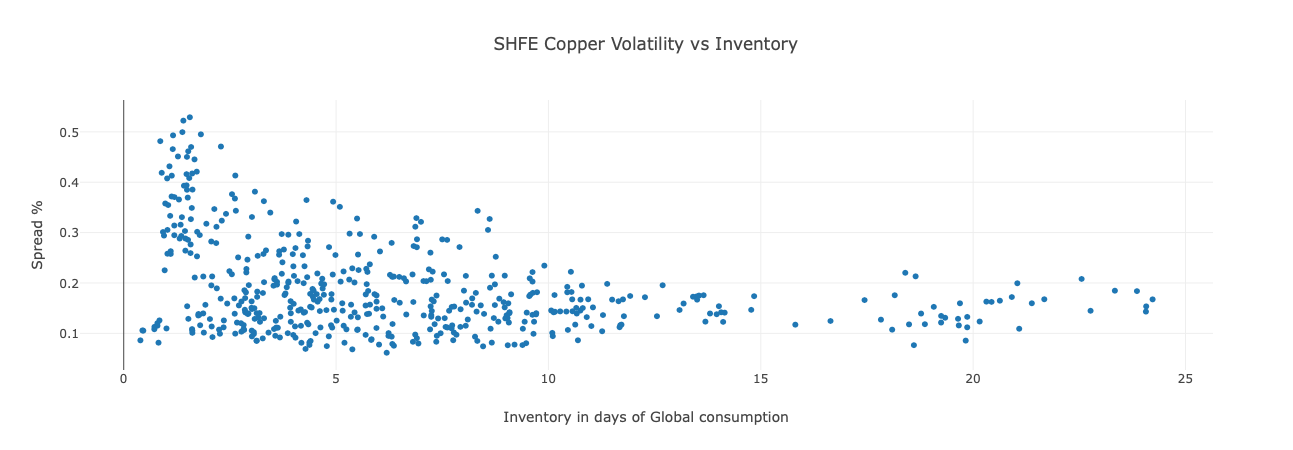

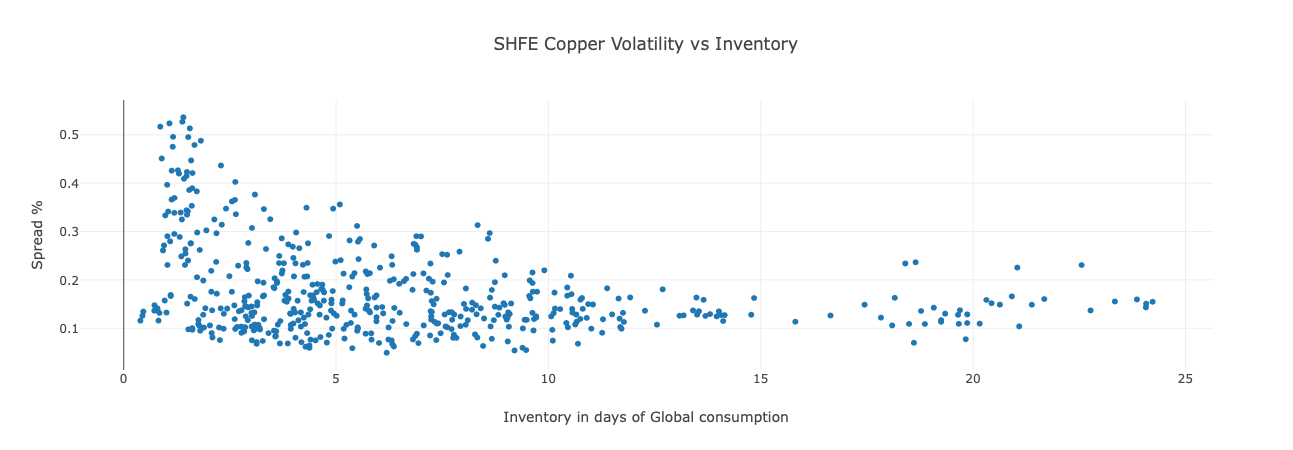

In [61]:
vol = pd.read_pickle('data/SCFc-fc-px').pct_change().rolling(20).std()*np.sqrt(252)
vol_vs_inv = pd.concat([inv,vol], axis=1).dropna()

iplot(go.Figure(data=[go.Scatter(x=vol_vs_inv['SHFE On Warrant in Days'], y=vol_vs_inv.SCFc07, mode='markers')],
     layout=go.Layout(title='SHFE Copper Volatility vs Inventory', 
                      xaxis=dict(title='Inventory in days of Global consumption'),
                      yaxis=dict(title='Spread %'),yaxis2=dict(title='Spread', overlaying='y', side='right'))))

iplot(go.Figure(data=[go.Scatter(x=vol_vs_inv['SHFE On Warrant in Days'], y=vol_vs_inv.SCFc01, mode='markers')],
     layout=go.Layout(title='SHFE Copper Volatility vs Inventory', 
                      xaxis=dict(title='Inventory in days of Global consumption'),
                      yaxis=dict(title='Spread %'),yaxis2=dict(title='Spread', overlaying='y', side='right'))))



In [69]:
ints = pd.date_range(vol_vs_inv.index.min(), vol_vs_inv.index.max(), periods=4)
vl = vol_vs_inv.SCFc07

r = vl.corr(vol_vs_inv['SHFE On Warrant in Days'], method='spearman')
int_0 = utl.rCI(r, len(vol_vs_inv), method='spearman')

r = vl[ints[0]:ints[1]].corr(vol_vs_inv['SHFE On Warrant in Days'], method='spearman')
int_1 = utl.rCI(r, len(vol_vs_inv), method='spearman')

r = vl[ints[1]:ints[2]].corr(vol_vs_inv['SHFE On Warrant in Days'], method='spearman')
int_2 = utl.rCI(r, len(vol_vs_inv), method='spearman')

r = vl[ints[2]:ints[3]].corr(vol_vs_inv['SHFE On Warrant in Days'], method='spearman')
int_3 = utl.rCI(r, len(vol_vs_inv), method='spearman')

table = pd.DataFrame(data = [int_0, int_1, int_2, int_3], 
                     columns=['Spearman Correlation', 'Lower Limit', 'Upper Limit'], index=['2008-2018', 
                                                                         '%s - %s'%(ints[0].date(),ints[1].date()),
                                                                         '%s - %s'%(ints[1].date(),ints[2].date()),
                                                                         '%s - %s'%(ints[2].date(),ints[3].date()),
                                                                        ])
table

,Spearman Correlation,Lower Limit,Upper Limit
2008-2018,-0.302250,-0.378691,-0.221714
2008-01-04 - 2011-08-12,-0.446819,-0.513340,-0.374960
2011-08-12 - 2015-03-20,-0.002579,-0.088880,0.083760
2015-03-20 - 2018-10-26,-0.069300,-0.154696,0.017123
